In [12]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# directory determination
from os import chdir

chdir('D:\\Courses\\University\\Term 7\\Applied Machine Learning\\HW\\HW2\\Exercise-3')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Soheil Hekmat's Answer

# Load the data

In [13]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
print(y)
print(tx)

[109.81967768  73.68895452  96.58434842 ...  58.32779473  74.38901745
  51.59669261]
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


In [27]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: find shape of y and tx
print(y.shape)
#print(np.transpose(y).shape)
print(tx.shape)
# it shows that we have 10000 rows for each one but one of them has 2 columns
# except the other one which has 1 column
# ***************************************************

(10000,)
(10000, 2)


# Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [14]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: return the mseloss
    e = y - tx.dot(w)
    mse = e**2
    mseloss = mse.mean()
    return mseloss
    # ***************************************************
    raise NotImplementedError

# Grid Search

Fill in the function `grid_search()` below:

In [15]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # here we use two for loops one for each dimension of w
    # we use enumerate to save each index and relate it to it's loss
    # which we get from previous function we built
    for index_row, row in enumerate(w0):
        for index_column, column in enumerate(w1):
            w = np.array([row, column])
            losses[index_row, index_column] = compute_loss(y, tx, w)
    # now we print the minimum value of losses and it's related w0 and w1        
    print('minimum value of all losses is: '+ str(np.min(losses)))
#     for i in range(10):
#         for j in range(10):
#             if losses[i,j] == np.min(losses):   
#                 print('in that case w0 is:' + str(w0(i)) + '\n and w1 is: '+str(w1(j)))
    # ***************************************************
    return losses
    raise NotImplementedError
    

Let us play with the grid search demo now!

minimum value of all losses is: 37.58708203904647
Grid Search: loss*=37.58708203904647, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.094 seconds


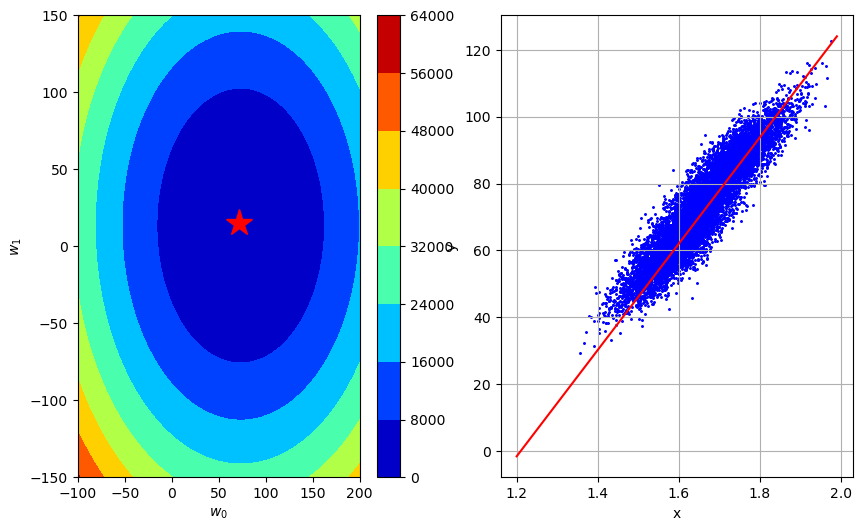

In [28]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals = 50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [17]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector and return them
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    # ***************************************************
    return grad, err
    raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [24]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        grad, err = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
#         raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma * grad
        # ***************************************************
#         raise NotImplementedError
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [39]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2125212.8925597533, w0=-892.6706077997893, w1=901.3479712434987
Gradient Descent(1/49): loss=1721428.2896107894, w0=-796.0741548195998, w1=812.5611453626477
Gradient Descent(2/49): loss=1394362.76122213, w0=-709.1373471374293, w1=732.6530020698817
Gradient Descent(3/49): loss=1129439.6832273148, w0=-630.8942202234757, w1=660.7356731063924
Gradient Descent(4/49): loss=914851.9900515148, w0=-560.4754060009176, w1=596.0100770392519
Gradient Descent(5/49): loss=741035.958579117, w0=-497.0984732006152, w1=537.7570405788255
Gradient Descent(6/49): loss=600244.9730864748, w0=-440.0592336803431, w1=485.32930776444175
Gradient Descent(7/49): loss=486204.2748374346, w0=-388.7239181120982, w1=438.14434823149645
Gradient Descent(8/49): loss=393831.3092557121, w0=-342.5221341006778, w1=395.67788465184566
Gradient Descent(9/49): loss=319009.2071345168, w0=-300.9405284903995, w1=357.45806743015993
Gradient Descent(10/49): loss=258403.30441634875, w0=-263.517083441149, w1=

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
    
# plot_figure(max_iters)
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>